# German City Foundation

## TO-DO

die leeren Werte rausfinden + ich habe jetzt Einwohnerzahlen

In [15]:
import pandas as pd
import sqlite3

cnx = sqlite3.connect('second_and_better_valid-db.sqlite')

df = pd.read_sql_query("SELECT * FROM CityTable", cnx)

df.head()

,city,gruendungsjahr,breitengrad,laengengrad,einwohnerzahl,jahr_sollte_ueberprueft_werden
0,Andernach,12,50.439722222222,7.4016666666667,29.860,1
1,Kempten (Allgäu),15,47.733333333333,10.316666666667,68.330,1
2,Augsburg,-15,48.371666666667,10.898333333333,292.851,0
3,Neu-Ulm,1810,48.394166666667,9.9988888888889,57.727,0
4,Putbus,1810,54.353333333333,13.471944444444,4396,1


In [16]:
#ich musste ein paar Werte, aber nicht viele, recherchieren und nachtragen

In [17]:
# convert coordinates for plotting:
df['breitengrad'] = df['breitengrad'].astype('float64')
df['laengengrad'] = df['laengengrad'].astype('float64')

In [18]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os
#plt.rcParams['axes.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 12
#plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
# Einwohnzerzahl needs to be converted to an Int datatype, because it is a string:
type(df['einwohnerzahl'][0])

str

In [20]:
df['einwohnerzahl'] = df['einwohnerzahl'].apply(lambda x: int(str(x).replace('.','')))
type(df['einwohnerzahl'][0])

numpy.int64

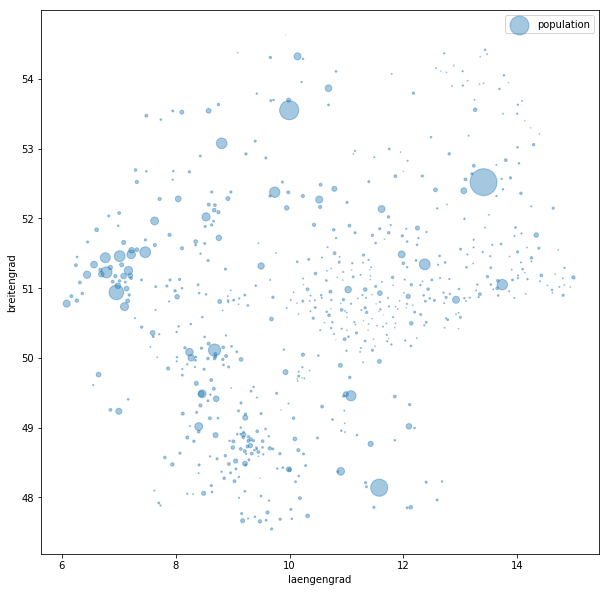

In [21]:
#list(df.columns.values)
#df.plot(kind="scatter", x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/5000, label="population")
#save_fig("bad_visualization_plot")
df.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/5000, label="population",
               figsize=(10,10))

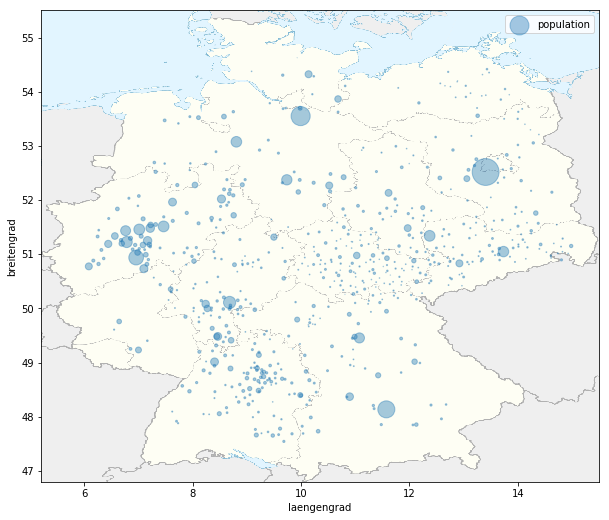

In [24]:
import matplotlib.image as mpimg

#umrisskarte-deutschland_img = mpimg.imread('./img/umrisskarte-deutschland.png')


ax = df.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/5000, label="population",
               figsize=(10,10))

plt.imshow(mpimg.imread('./img/umrisskarte-deutschland.png'), extent=[5.2, 15.5, 46.8, 55.5], alpha=0.5,
           cmap=plt.get_cmap("jet"))


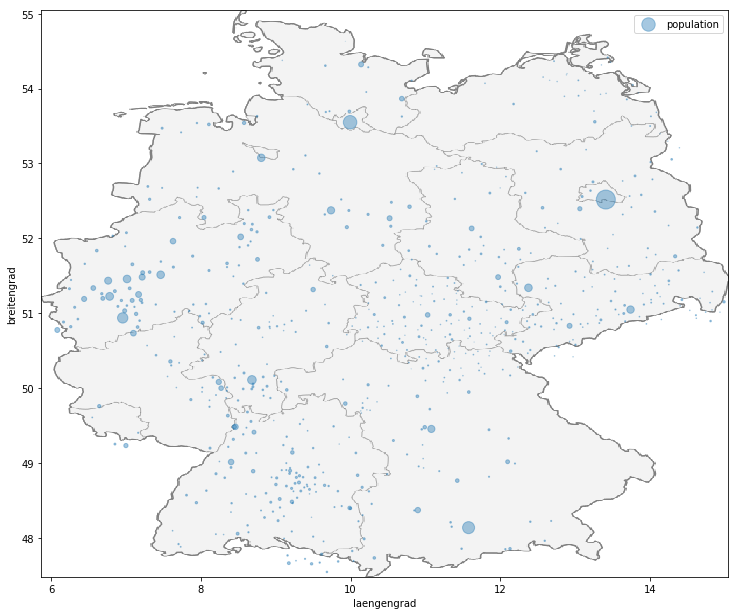

In [48]:
# extent(left, right, bottom, top) attribute needs more accurate values:

#westlichster Punkt: 51.049887,5.8652753
#östlichster Punkt: 51.2727761,15.0395564
#nördlichster Punkt (Spitze Sylt): 55.0511637,8.2088865
#südlichster Punkt: 47.4809718,7.6516408

ax = df.plot.scatter( x="laengengrad", y="breitengrad", alpha=0.4, s=df["einwohnerzahl"]/10000, label="population",
               figsize=(12.3125,16.6666666))

# not sure waht, but something distorts my picture.

plt.imshow(mpimg.imread('./img/Karte_Deutschland.png'), extent=[5.8652753, 15.0395564, 47.4809718, 55.0511637], alpha=0.5,
           cmap=plt.get_cmap("jet"))

In [23]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=47.1,urcrnrlat=55.2, llcrnrlon=5.5,urcrnrlon=15.3, resolution='l')

m.bluemarble()
# m.etopo()

ImportError: warpimage method requires PIL (http://www.pythonware.com/products/pil)

In [ ]:
import geopandas as gpd
import geoplot as gplt

from quilt.data.ResidentMario import geoplot_data
continental_cities = gpd.read_file(geoplot_data.usa_cities()).query('POP_2010 > 100000')
contiguous_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_cities.head()

ax = gplt.pointplot(continental_cities)
gplt.polyplot(contiguous_usa, ax=ax)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

austin = (-97.75, 30.25)
hawaii = (-157.8, 21.3)
washington = (-77.01, 38.90)
chicago = (-87.68, 41.83)
losangeles = (-118.25, 34.05)

m = Basemap(projection = 'merc', llcrnrlat=10, urcrnrlat=50,
        llcrnrlon=-160, urcrnrlon=-60)

#m.drawcoastlines()
m.fillcontinents (color='lightgray', lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

#m.drawcounties()

x, y = m(*zip(*[hawaii, austin, washington, chicago, losangeles]))
m.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

plt.title('Mercator Projection')
plt.show()
